In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from skimage import data, util, exposure, color

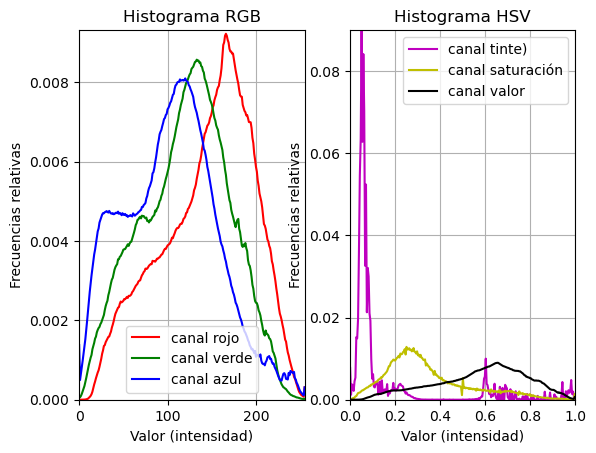

In [3]:
file = 'images/breastXray.tif'
img  = Image.open(file)
img_np = np.array(img)

img_RGB = Image.open('images/PerroBoston.jpg')
imgRGB_np = np.array(img_RGB)
img_hist, bins = exposure.histogram(imgRGB_np, channel_axis=2, normalize=True)
M = img_hist.max()

plt.subplot(121)
plt.plot(bins, img_hist[0,:],'r', label='canal rojo')
plt.plot(bins, img_hist[1,:],'g', label='canal verde')
plt.plot(bins, img_hist[2,:],'b', label='canal azul')

plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.legend()
plt.title('Histograma RGB')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()



plt.subplot(122)
img_hsv = color.rgb2hsv(imgRGB_np)

img_hist, bins = exposure.histogram(img_hsv, channel_axis=2, normalize=True)

plt.plot(bins, img_hist[0,:],'m', label='canal tinte)')
plt.plot(bins, img_hist[1,:],'y', label='canal saturación')
plt.plot(bins, img_hist[2,:],'k', label='canal valor')

plt.axis([0,1, 0, img_hist.max()])
plt.legend()
plt.title('Histograma HSV')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()



In [5]:
file = 'images/breastXray.tif'

img  = Image.open(file)

exposure.is_low_contrast(img,  fraction_threshold=0.2)

False